In [6]:
!pip install prophet

In [5]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [7]:
df=pd.read_csv('/content/MaunaLoaDailyTemps.csv')
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [8]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [9]:
df=df[['DATE','AvgTemp']]

In [10]:
df.columns=['ds','y']
df.head()

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [11]:
df['ds']=pd.to_datetime(df['ds'])

<Axes: xlabel='ds'>

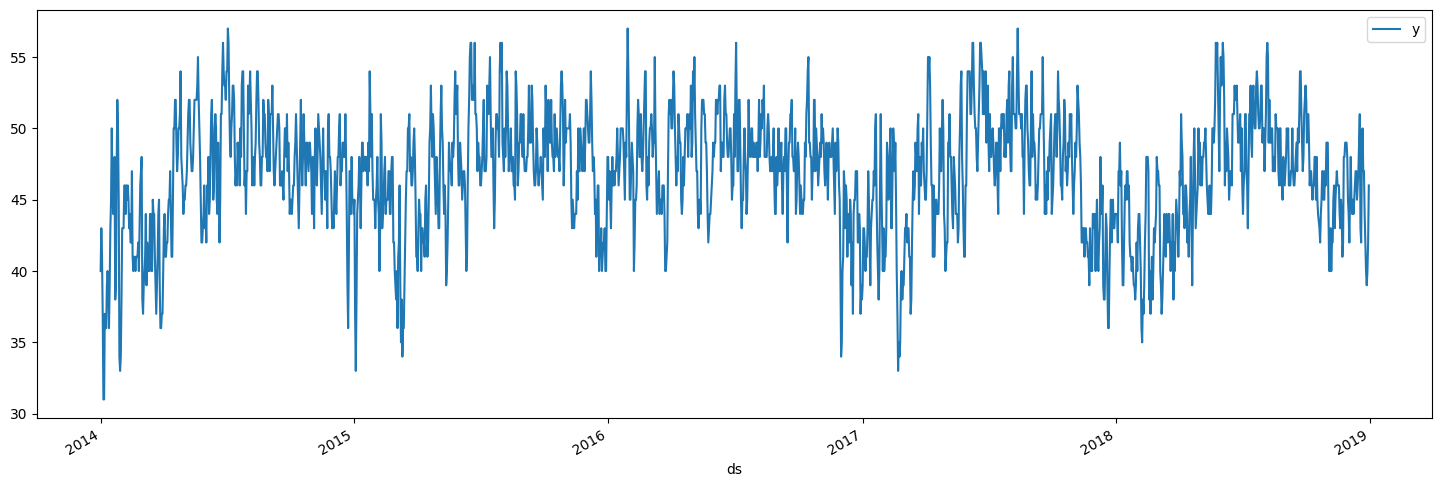

In [12]:
df.plot(x='ds',y='y',figsize=(18,6))

In [13]:
len(df)

1821

In [14]:
train=df.iloc[:len(df)-365]
test=df.iloc[len(df)-365:]

In [16]:
m=Prophet()
m.fit(train)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptbsyp_y2/51jl9sf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptbsyp_y2/283o5a7z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15011', 'data', 'file=/tmp/tmptbsyp_y2/51jl9sf4.json', 'init=/tmp/tmptbsyp_y2/283o5a7z.json', 'output', 'file=/tmp/tmptbsyp_y2/prophet_model8ga7xau7/prophet_model-20240129142458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [17]:
future=m.make_future_dataframe(periods=365)
forecast=m.predict(future)

In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1816,2018-12-25,46.192062,36.653655,45.808991,44.544772,47.472977,-4.948818,-4.948818,-4.948818,-0.145826,-0.145826,-0.145826,-4.802992,-4.802992,-4.802992,0.0,0.0,0.0,41.243244
1817,2018-12-26,46.191314,36.609290,45.279333,44.534916,47.479112,-4.904014,-4.904014,-4.904014,-0.052643,-0.052643,-0.052643,-4.851371,-4.851371,-4.851371,0.0,0.0,0.0,41.287300
1818,2018-12-27,46.190565,36.941735,45.751420,44.527605,47.481960,-4.772865,-4.772865,-4.772865,0.098682,0.098682,0.098682,-4.871547,-4.871547,-4.871547,0.0,0.0,0.0,41.417700
1819,2018-12-28,46.189817,36.792703,46.061925,44.519637,47.483146,-4.436219,-4.436219,-4.436219,0.426907,0.426907,0.426907,-4.863127,-4.863127,-4.863127,0.0,0.0,0.0,41.753597
1820,2018-12-29,46.189068,36.709170,46.024790,44.511844,47.485169,-4.831995,-4.831995,-4.831995,-0.005789,-0.005789,-0.005789,-4.826206,-4.826206,-4.826206,0.0,0.0,0.0,41.357073


In [21]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [19]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()  #gives predictions till end of test dataset

,ds,yhat,yhat_lower,yhat_upper
1816,2018-12-25,41.243244,36.653655,45.808991
1817,2018-12-26,41.287300,36.609290,45.279333
1818,2018-12-27,41.417700,36.941735,45.751420
1819,2018-12-28,41.753597,36.792703,46.061925
1820,2018-12-29,41.357073,36.709170,46.024790


In [22]:
plot_plotly(m,forecast)

In [23]:
plot_components_plotly(m,forecast)

In [24]:
from statsmodels.tools.eval_measures import rmse

In [25]:
predictions=forecast.iloc[-365:]['yhat']

In [26]:

print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  3.460854304152485
Mean Value of Test Dataset: 46.3041095890411
